<a href="https://colab.research.google.com/github/christopher-ell/Deep_Learning_Begin/blob/master/BasicImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: https://www.tensorflow.org/tutorials/keras/basic_classification

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


**Import Fashion MNIST Dataset**

Uses data set MNIST a dataset of 70,000 grayscale clothing images with 10 categories. These are shown as 28 x 28 pixel images

In [2]:
## The MNIST dataset is considered one of the 'Hello World' datasets of 
## computer vision. 
## Since it is so common it can be downloaded directly from tensorflow
fashion_mnist = keras.datasets.fashion_mnist

## The MNIST dataset of 70,000 images is split into 60,000 training images and
## 10,000 test images
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
## Labels for items of clothing represented in the dataset by numbers 0-9
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Explore The Data**

In [4]:
## Shows 60,000 28x28 images in the training set
train_images.shape

(60000, 28, 28)

In [5]:
## Shows 60,000 training labels
len(train_labels)

60000

In [6]:
## Shows each label is an integer between 0 and 9
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
## Shows there are 10,000 28x28 images in the test set
test_images.shape

(10000, 28, 28)

In [8]:
## Show 10,000 labels in the test set
len(test_labels)

10000

**Preprocess The Data**

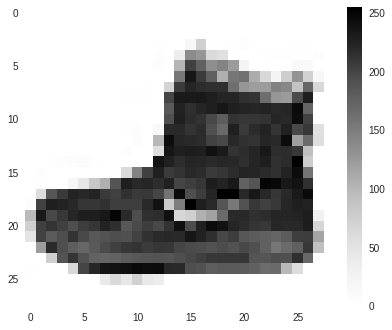

In [9]:
## plt.figure() creates a new figure to be used (before image put down)
plt.figure()
## Puts figure down in figure area created above
plt.imshow(train_images[0])
## Puts colorbar next to image showing range of colors by number
plt.colorbar()
## Gets rid of default grid
plt.grid(False)

In [0]:
## Scale all training images so that they are between 0 and 1
train_images = train_images / 255.0

## Scale all test images so that they are between 0 and 1
test_images = test_images / 255.0

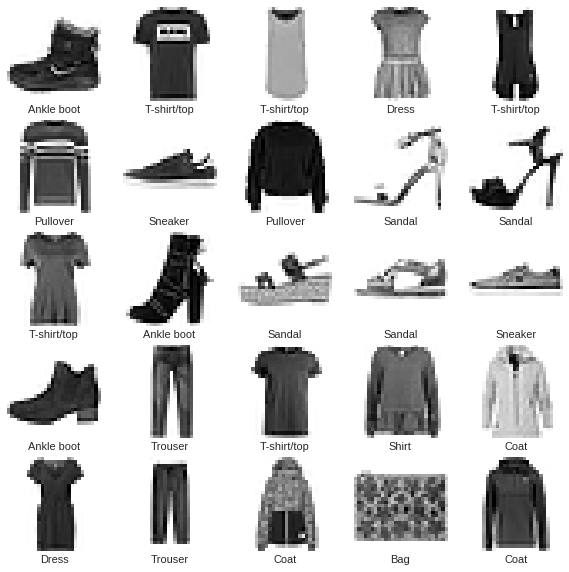

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

**Building The Model**

**Setup The Layers**

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

**Compile The Model**

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

**Train The Model**

In [14]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 91us/step - loss: 0.4973 - acc: 0.8242
Epoch 2/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.3789 - acc: 0.8626
Epoch 3/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.3389 - acc: 0.8774
Epoch 4/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.3125 - acc: 0.8840
Epoch 5/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.2960 - acc: 0.8912


**Evaluation Accuracy**

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy: ', test_acc)

10000/10000 [==============================] - 0s 41us/step
Test accuracy:  0.8638


In [0]:
predictions = model.predict(test_images)

In [17]:
predictions[0]

array([1.5093409e-06, 2.9722926e-07, 1.3589803e-06, 4.7725557e-06,
       5.5057575e-07, 5.0636092e-03, 4.8821497e-05, 2.4379704e-02,
       2.2971549e-04, 9.7026968e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])

9

In [19]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ([])".format(class_names[predicted_label],
                                      100*np.max(predictions_array),
                                      class_names[true_label]),
                                      color=color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
    

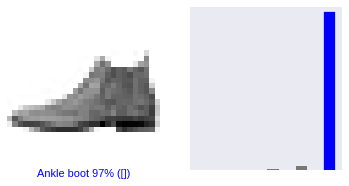

In [21]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)

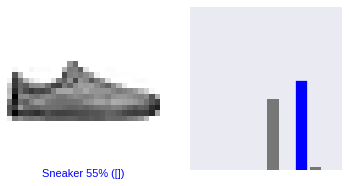

In [22]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)

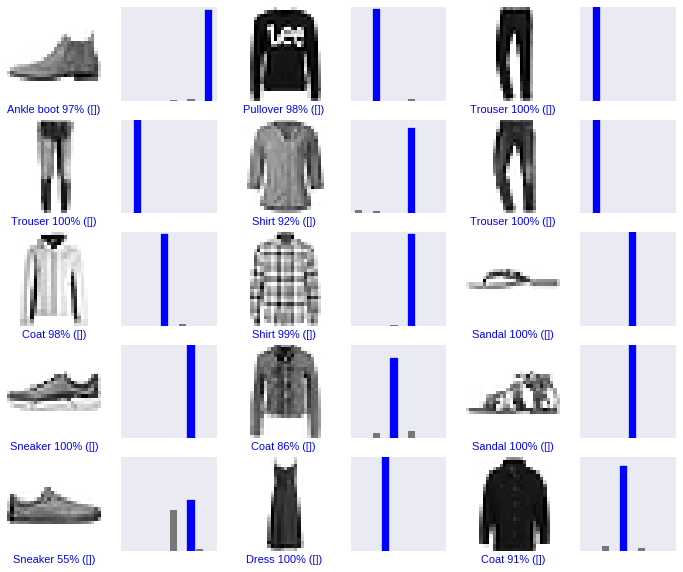

In [23]:
# Plot the first x test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
  plot_value_array(i, predictions, test_labels)

In [24]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [25]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


In [26]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.5093424e-06 2.9722926e-07 1.3589842e-06 4.7725512e-06 5.5057677e-07
  5.0636139e-03 4.8821545e-05 2.4379686e-02 2.2971592e-04 9.7026968e-01]]


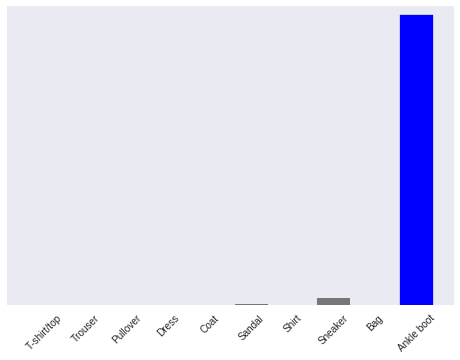

In [27]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [28]:
np.argmax(predictions_single[0])

9